In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("BreastCancer.csv",index_col=False)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

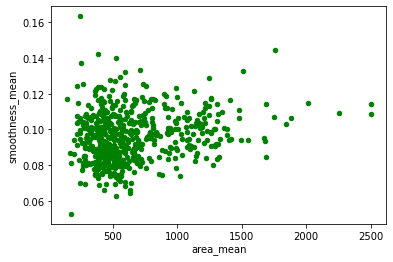

In [6]:
df.plot.scatter(x="area_mean",y="smoothness_mean",c="green")


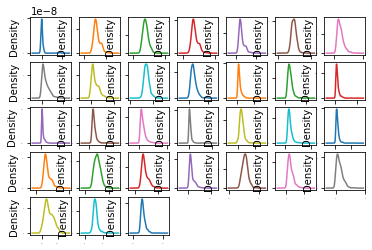

In [7]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [8]:
df.cov()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.563015e+16,3.287883e+07,5.364807e+07,2.222490e+08,4.262946e+09,-22802.053383,631.883924,499127.721282,214217.739286,-75792.615857,...,4.979381e+07,4.973106e+07,3.360214e+08,7.629681e+09,29510.163781,-58383.413342,605181.617857,289052.809853,-342061.639212,-67437.508622
radius_mean,3.287883e+07,1.241892e+01,4.907582e+00,8.544714e+01,1.224483e+03,0.008454,0.094197,0.190128,0.112475,0.014273,...,1.651375e+01,6.433100e+00,1.142886e+02,1.888227e+03,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
texture_mean,5.364807e+07,4.907582e+00,1.849891e+01,3.443976e+01,4.859938e+02,-0.001415,0.053767,0.103692,0.048977,0.008419,...,7.329267e+00,2.411015e+01,5.174593e+01,8.412838e+02,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
perimeter_mean,2.222490e+08,8.544714e+01,3.443976e+01,5.904405e+02,8.435772e+03,0.070836,0.714714,1.387234,0.802360,0.121922,...,1.138581e+02,4.525811e+01,7.923282e+02,1.302615e+04,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
area_mean,4.262946e+09,1.224483e+03,4.859938e+02,8.435772e+03,1.238436e+05,0.876178,9.264931,19.244924,11.241958,1.459596,...,1.637521e+03,6.218249e+02,1.134179e+04,1.921926e+05,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
smoothness_mean,-2.280205e+04,8.454460e-03,-1.414779e-03,7.083607e-02,8.761781e-01,0.000198,0.000490,0.000585,0.000302,0.000215,...,1.448691e-02,3.118110e-03,1.128795e-01,1.655299e+00,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
compactness_mean,6.318839e+02,9.419706e-02,5.376681e-02,7.147141e-01,9.264931e+00,0.000490,0.002789,0.003718,0.001703,0.000873,...,1.366429e-01,8.054412e-02,1.047413e+00,1.532344e+01,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
concavity_mean,4.991277e+05,1.901276e-01,1.036923e-01,1.387234e+00,1.924492e+01,0.000585,0.003718,0.006355,0.002850,0.001094,...,2.651810e-01,1.469342e-01,1.954350e+00,3.068241e+01,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
concave points_mean,2.142177e+05,1.124751e-01,4.897693e-02,8.023604e-01,1.124196e+01,0.000302,0.001703,0.002850,0.001506,0.000492,...,1.557207e-01,6.981902e-02,1.116016e+00,1.788688e+01,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
symmetry_mean,-7.579262e+04,1.427317e-02,8.418876e-03,1.219216e-01,1.459596e+00,0.000215,0.000873,0.001094,0.000492,0.000752,...,2.460890e-02,1.527421e-02,2.018958e-01,2.765725e+00,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217


<AxesSubplot:>

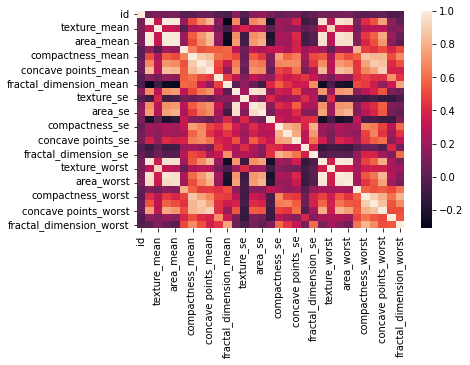

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
Y = df['diagnosis']
X = df.drop(['diagnosis','id'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [17]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### in it we are getting best accuracy  in DecisionTreeClassifier so we will use this model for model saving

In [18]:
Cancer_model=DecisionTreeClassifier()
Cancer_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
print("Accuracy is", Cancer_model.score(X_test, Y_test)*100)
Y_pred = Cancer_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

Accuracy is 93.85964912280701


array([[71,  4],
       [ 3, 36]], dtype=int64)

## Model Saving 

In [20]:
import pickle
Filename = "Cancer_Model.pkl"

with open(Filename, 'wb') as file:  
    pickle.dump(Cancer_model, file)

In [21]:
with open(Filename, 'rb') as file:  
    Cancer_model = pickle.load(file)